### Example usage of functions in virialcoeff.py

We provide calculation examples of the second virial coefficient, Boyle and critical temperatures, etc., using the monomer pair (or rescaled dimer pair) approximation.

In [1]:
import matplotlib.pyplot as plt
import os

if 'COLAB_GPU' in os.environ:
    !git clone https://github.com/adachi24/virialcoeff.git
    os.chdir('virialcoeff')

import virialcoeff

Choose the model of interactions between amino acid residues.

In [2]:
interaction = virialcoeff.interaction_dict('tesei')  # HPS-Tesei model
# interaction = virialcoeff.interaction_dict('dignon')  # HPS-Dignon model
# interaction = virialcoeff.interaction_dict('mpipi')  # Mpipi model

Calculate the second virial coefficient for sample sequence and temperature.

In [3]:
seq = 'QGVHPQHLPSLLQTGVLPPGMDLSHLQGISGPILGQPFYPLPAASHPLLN'
T = 300.0  # Temperature [K]
alpha = 0.75  # Rescaling factor

B_MP = virialcoeff.virial_monomer(T, seq, seq, interaction)  # Virial coefficient within the monomer pair approximation [nm^3]
B_RDP = virialcoeff.virial_resc_dimer(T, seq, seq, interaction, alpha)  # Virial coefficient within the rescaled dimer pair approximation [nm^3]

print(f'B_MP = {B_MP:.3g} nm^3')
print(f'B_RDP = {B_RDP:.3g} nm^3')

B_MP = 427 nm^3
B_RDP = -321 nm^3


Calculate the Boyle temperature for a sample sequence.

In [4]:
seq = 'QGVHPQHLPSLLQTGVLPPGMDLSHLQGISGPILGQPFYPLPAASHPLLN'
alpha = 0.75  # Rescaling factor

T_B_MP = virialcoeff.boyle_temp_monomer(seq, interaction)  # Boyle temperature within the monomer pair approximation [K]
T_B_RDP = virialcoeff.boyle_temp_resc_dimer(seq, interaction, alpha)  # Boyle temperature within the rescaled dimer pair approximation [K]

print(f'T_B_MP = {T_B_MP:.3g} K')
print(f'T_B_RDP = {T_B_RDP:.3g} K')

T_B_MP = 147 K
T_B_RDP = 398 K


Calculate the critical temperature for a sample sequence.

In [5]:
seq = 'QGVHPQHLPSLLQTGVLPPGMDLSHLQGISGPILGQPFYPLPAASHPLLN'
alpha = 0.75  # Rescaling factor
l_lb = 3.0  # Lattice constant in the Flory-Huggins theory in units of the bond length lb (= 0.38 nm).

T_c_RDP = virialcoeff.critical_temp_resc_dimer(seq, interaction, alpha, l_lb)  # Critical temperature within the rescaled dimer pair approximation [K]

print(f'T_c_RDP = {T_c_RDP:.3g} K')

T_c_RDP = 250 K


Calculate the effective virial coefficient for sample sequence pair and temperature.

In [6]:
seq1 = 'QGVHPQHLPSLLQTGVLPPGMDLSHLQGISGPILGQPFYPLPAASHPLLN'
seq2 = 'LSDTSPMDSSPSGIPKRRTARKQLPKRTIQEVLEEQSEDEDREAKRKKEE'
T = 300.0  # Temperature [K]
alpha = 0.75  # Rescaling factor

B12_MP = virialcoeff.virial_monomer(T, seq1, seq2, interaction)  # Inter-component virial coefficient within the monomer pair approximation [nm^3]
B12_RDP = virialcoeff.virial_resc_dimer(T, seq1, seq2, interaction, alpha)  # Inter-component virial coefficient within the rescaled dimer pair approximation [nm^3]
Btilde12_MP = virialcoeff.effective_virial_monomer(T, seq1, seq2, interaction)  # Effective inter-component virial coefficient within the monomer pair approximation [nm^3]
Btilde12_RDP = virialcoeff.effective_virial_resc_dimer(T, seq1, seq2, interaction, alpha)  # Effective inter-component virial coefficient within the rescaled dimer pair approximation [nm^3]

print(f'B12_MP = {B12_MP:.3g} nm^3')
print(f'B12_RDP = {B12_RDP:.3g} nm^3')
print(f'Btilde12_MP = {Btilde12_MP:.3g} nm^3')
print(f'Btilde12_RDP = {Btilde12_RDP:.3g} nm^3')

B12_MP = 520 nm^3
B12_RDP = -141 nm^3
Btilde12_MP = 34.8 nm^3
Btilde12_RDP = 158 nm^3


Calculate and plot the virial coefficient matrix for amino acid monomers (or dimers).

In [7]:
T = 300.0  # Tempearture [K]
alpha = 0.75  # Rescaling factor

v_MP = virialcoeff.virial_matrix_monomer(T, interaction)  # Virial coefficient matrix for amino acid monomers [nm^3]
v_RDP = virialcoeff.virial_matrix_resc_dimer(T, interaction, alpha)  # Virial coefficient matrix for amino acid dimers within the rescaled dimer pair approximation [nm^3]

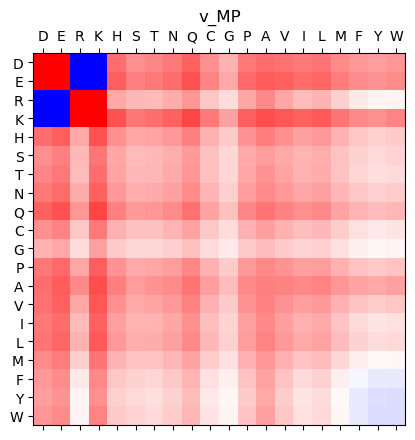

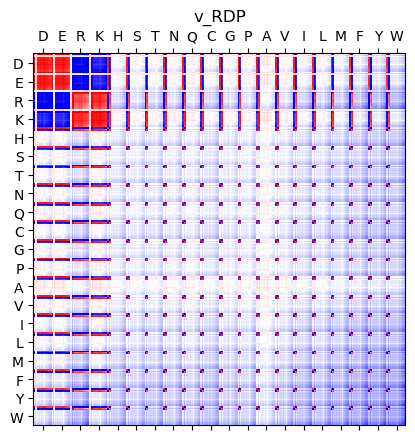

In [8]:
idx_monomer = list('DERKHSTNQCGPAVILMFYW')
idx_dimer = [f'{aa_1}{aa_2}' for aa_1 in idx_monomer for aa_2 in idx_monomer]
v_RDP.loc[idx_dimer, idx_dimer]

plt.matshow(v_MP.loc[idx_monomer, idx_monomer], cmap='bwr', vmin=-0.5, vmax=0.5)
plt.title('v_MP')
plt.xticks(range(20), idx_monomer)
plt.yticks(range(20), idx_monomer)
plt.show()

plt.matshow(v_RDP.loc[idx_dimer, idx_dimer], cmap='bwr', vmin=-2, vmax=2)
plt.title('v_RDP')
plt.xticks(range(10, 400, 20), [f'{aa}' for aa in idx_monomer])
plt.yticks(range(10, 400, 20), [f'{aa}' for aa in idx_monomer])
plt.show()